In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
num_cols = [
    'size_bytes',
    'price',
    'rating_count_tot',
    'rating_count_ver',
    'user_rating_ver',
    'cont_rating',
    'sup_devices.num',
    'ipadSc_urls.num',
    'lang.num',
    'vpp_lic'
]

cat_cols = [
    'track_name',
    'currency',
    'prime_genre'
]

target_col = 'user_rating'

cols = num_cols + cat_cols + [target_col]

In [4]:
data = data[cols]
data['cont_rating'] = data['cont_rating'].str.slice(0, -1).astype(int)
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name,currency,prime_genre,user_rating
0,100788224,3.99,21292,26,4.5,4,38,5,10,1,PAC-MAN Premium,USD,Games,4.0
1,158578688,0.00,161065,26,3.5,4,37,5,23,1,Evernote - stay organized,USD,Productivity,4.0
2,100524032,0.00,188583,2822,4.5,4,37,5,3,1,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,Weather,3.5
3,128512000,0.00,262241,649,4.5,12,37,5,9,1,"eBay: Best App to Buy, Sell, Save! Online Shop...",USD,Shopping,4.0
4,92774400,0.00,985920,5320,5.0,4,37,5,45,1,Bible,USD,Reference,4.5


In [5]:
data.isna().mean()

size_bytes          0.0
price               0.0
rating_count_tot    0.0
rating_count_ver    0.0
user_rating_ver     0.0
cont_rating         0.0
sup_devices.num     0.0
ipadSc_urls.num     0.0
lang.num            0.0
vpp_lic             0.0
track_name          0.0
currency            0.0
prime_genre         0.0
user_rating         0.0
dtype: float64

In [6]:
for col in cat_cols:
    print(f'{col} DISTRIBUTION')
    print(data[col].value_counts())
    print()

track_name DISTRIBUTION
VR Roller Coaster                                   2
Mannequin Challenge                                 2
PAC-MAN Premium                                     1
European Qualifiers Official App                    1
Tooth Fairy Princess - Magical Adventure            1
                                                   ..
Heart of Vegas Slots – Casino Slot Machine Games    1
赤ペン 提出カメラ                                           1
J&J Official 7 Minute Workout                       1
Beautiful Japanese Handwriting                      1
Escape the Sweet Shop Series                        1
Name: track_name, Length: 7195, dtype: int64

currency DISTRIBUTION
USD    7197
Name: currency, dtype: int64

prime_genre DISTRIBUTION
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music        

In [7]:
data = data.drop(columns=['currency'])
cat_cols.remove('currency')

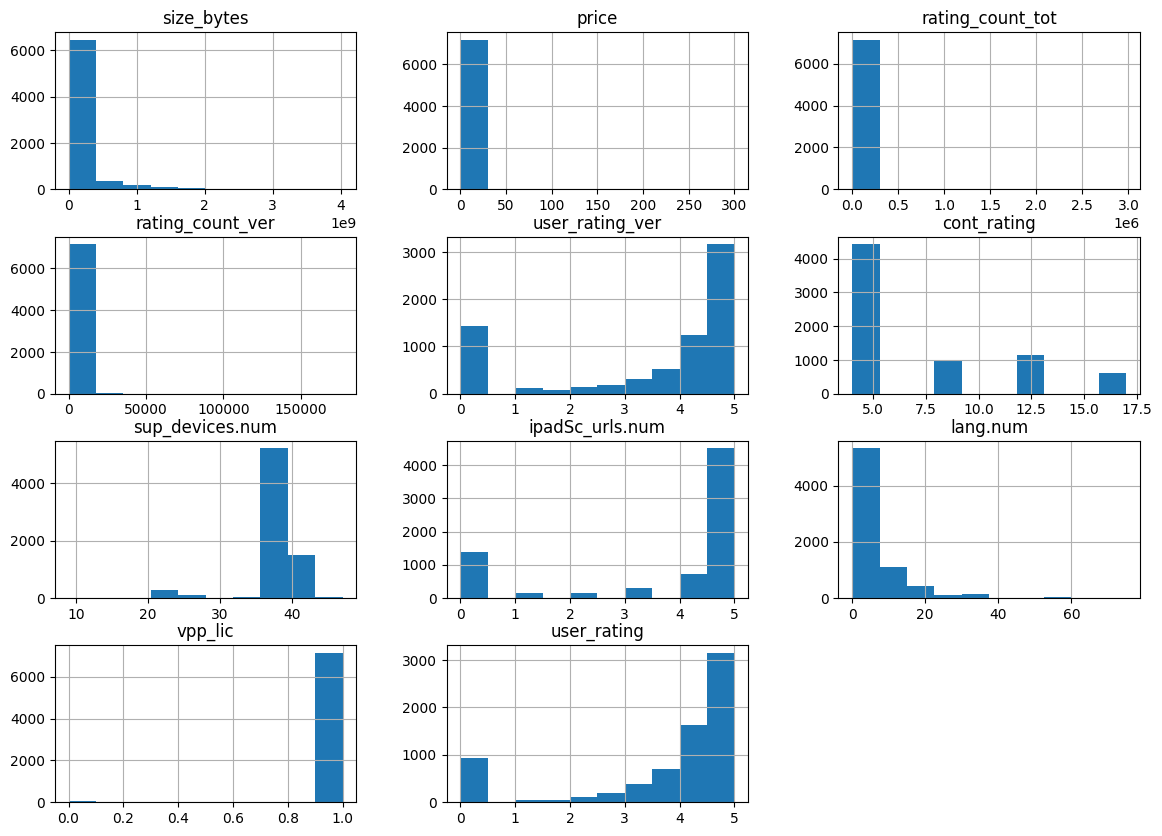

In [8]:
data.hist(column=num_cols+cat_cols+[target_col], figsize=(14, 10))
None

In [9]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-9-96612fe94b20>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
<ipython-input-9-96612fe94b20>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,user_rating
size_bytes,1.00,0.18,0.00,0.01,0.09,0.14,-0.12,0.15,0.00,-0.15,0.07
price,0.18,1.00,-0.04,-0.02,0.03,-0.03,-0.12,0.07,-0.01,-0.03,0.05
rating_count_tot,0.00,-0.04,1.00,0.16,0.09,0.01,0.01,0.02,0.14,-0.00,0.08
rating_count_ver,0.01,-0.02,0.16,1.00,0.08,0.00,0.04,0.02,0.01,0.01,0.07
user_rating_ver,0.09,0.03,0.09,0.08,1.00,-0.12,-0.02,0.28,0.18,0.05,0.77
cont_rating,0.14,-0.03,0.01,0.00,-0.12,1.00,0.02,-0.11,-0.07,-0.04,-0.10
sup_devices.num,-0.12,-0.12,0.01,0.04,-0.02,0.02,1.00,-0.04,-0.04,-0.04,-0.04
ipadSc_urls.num,0.15,0.07,0.02,0.02,0.28,-0.11,-0.04,1.00,0.09,0.07,0.27
lang.num,0.00,-0.01,0.14,0.01,0.18,-0.07,-0.04,0.09,1.00,0.03,0.17
vpp_lic,-0.15,-0.03,-0.00,0.01,0.05,-0.04,-0.04,0.07,0.03,1.00,0.07


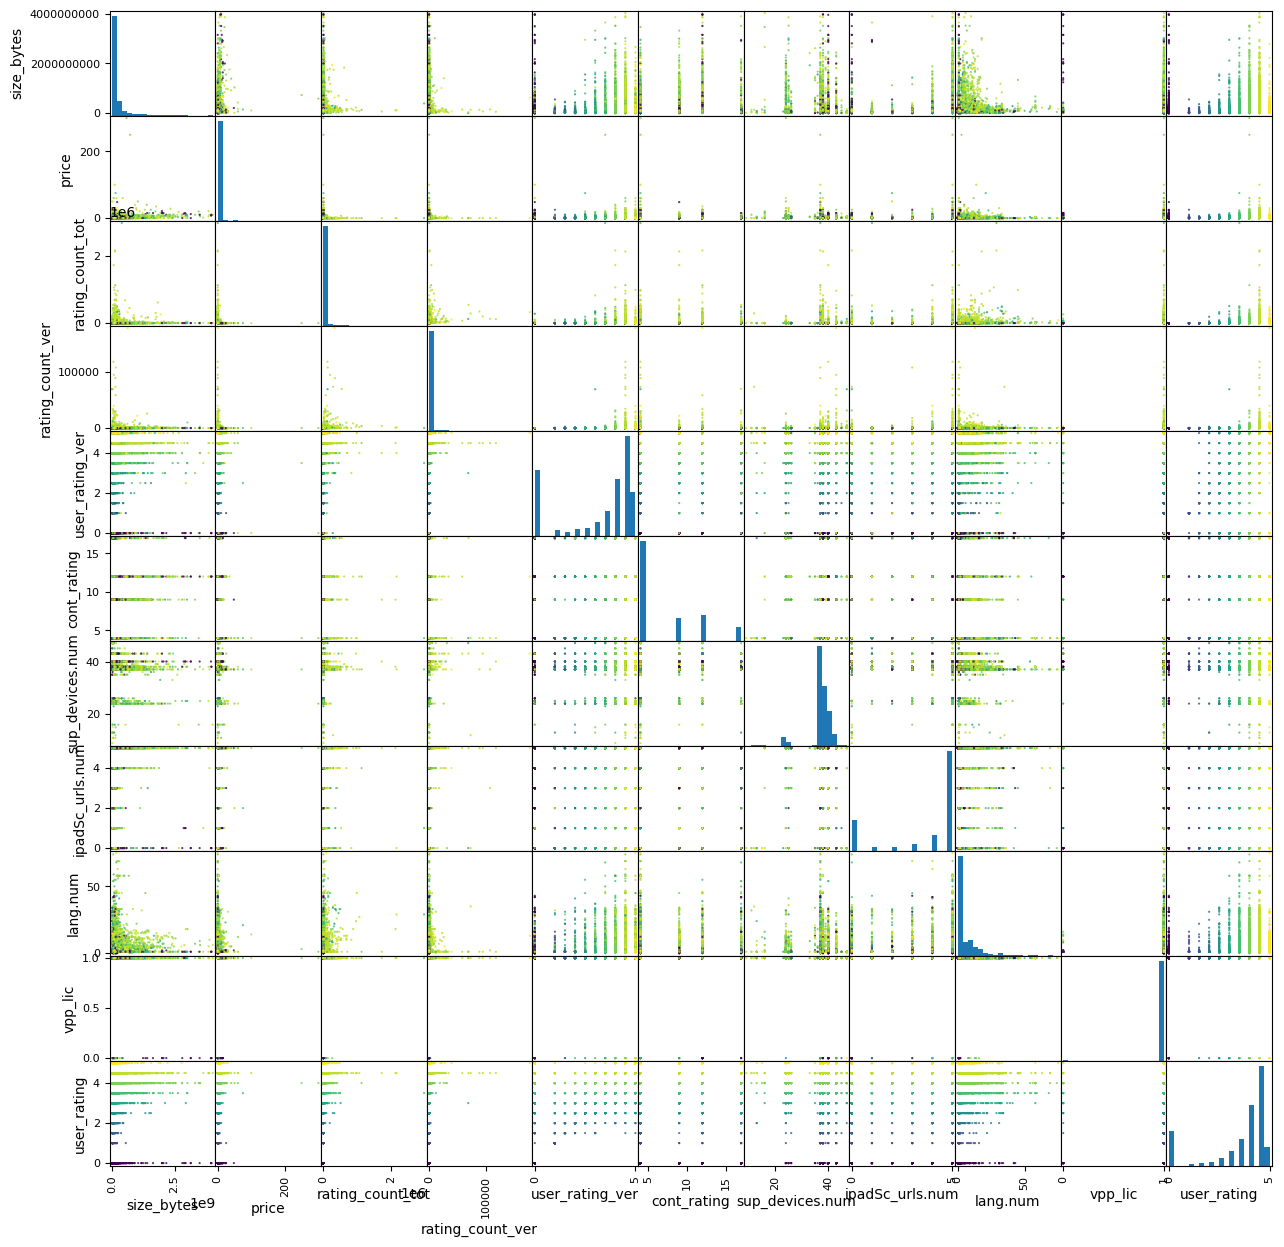

In [10]:
pd.plotting.scatter_matrix(data, c=data[target_col], figsize=(15, 15), hist_kwds={'bins': 20}, s=10, alpha=.8)
None

In [11]:
a = pd.DataFrame.from_dict({'categorical': ['a', 'b', 'a', 'c']})
a

,categorical
0,a
1,b
2,a
3,c


In [12]:
pd.get_dummies(a)

,categorical_a,categorical_b,categorical_c
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1


In [13]:
data = pd.get_dummies(data, columns=cat_cols)

In [14]:
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new

In [15]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[num_cols + cat_cols])
X = pca.transform(data[num_cols + cat_cols])

X = pca.fit_transform(data[num_cols + cat_cols])

In [16]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,7218,7219,7220,7221,7222,7223,7224,7225,7226,7227
0,-0.273806,0.388126,0.110902,-0.110805,0.688921,-0.714548,0.170753,0.651051,0.576471,0.083642,...,-0.102619,-0.225752,-0.159247,-0.094723,-0.131316,-0.154128,-0.126866,-0.10669,-0.188914,-0.100525
1,-0.112911,-0.295960,1.956477,-0.110805,0.136202,-0.714548,-0.096808,0.651051,2.218083,0.083642,...,-0.102619,-0.225752,6.279537,-0.094723,-0.131316,-0.154128,-0.126866,-0.10669,-0.188914,-0.100525
2,-0.274542,-0.295960,2.319827,0.602428,0.688921,-0.714548,-0.096808,0.651051,-0.307474,0.083642,...,-0.102619,-0.225752,-0.159247,-0.094723,-0.131316,-0.154128,-0.126866,-0.10669,-0.188914,9.947780
3,-0.196620,-0.295960,3.292413,0.048117,0.688921,1.133563,-0.096808,0.651051,0.450193,0.083642,...,-0.102619,-0.225752,-0.159247,-0.094723,7.615235,-0.154128,-0.126866,-0.10669,-0.188914,-0.100525
4,-0.296117,-0.295960,12.847931,1.239643,0.965281,-0.714548,-0.096808,0.651051,4.996197,0.083642,...,-0.102619,-0.225752,-0.159247,10.557136,-0.131316,-0.154128,-0.126866,-0.10669,-0.188914,-0.100525


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y, y_preds)}')
    print(f'MSE: {mean_squared_error(y, y_preds)}')

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
print_metrics(y_preds, y_test)

R^2: 0.4837896532494488
MSE: 1.2831747985270352


In [22]:
kr = KNeighborsRegressor()
kr.fit(X_train, y_train)
y_preds = kr.predict(X_test)
print_metrics(y_preds, y_test)

R^2: 0.38122814154934603
MSE: 1.5381180555555558


In [23]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate

In [24]:
cross_validate(LinearRegression(), X, data[target_col], cv=5,
               scoring={'r2_score': make_scorer(r2_score),
                        'mean_squared_error': make_scorer(mean_squared_error)},
               verbose=1)

{'fit_time': array([131.86901712, 130.0022912 , 130.77473855, 130.53050756,
        129.25744152]),
 'score_time': array([0.04049206, 0.0258379 , 0.04488373, 0.04488015, 0.0157938 ]),
 'test_r2_score': array([-0.09666943,  0.33203752,  0.47820629,  0.54714522,  0.37828639]),
 'test_mean_squared_error': array([0.99794168, 1.06411092, 1.14501262, 1.43351546, 1.96233411])}

In [25]:
cross_validate(KNeighborsRegressor(), X, data[target_col], cv=5,
               scoring={'r2_score': make_scorer(r2_score),
                        'mean_squared_error': make_scorer(mean_squared_error)})

{'fit_time': array([0.30529833, 0.31682777, 0.24927211, 0.25005031, 0.2707026 ]),
 'score_time': array([3.60716748, 4.67607021, 3.6070652 , 3.58212233, 4.7870667 ]),
 'test_r2_score': array([0.02913991, 0.14537387, 0.3685487 , 0.38274699, 0.52427814]),
 'test_mean_squared_error': array([0.88345833, 1.36147917, 1.38564281, 1.95391939, 1.50153579])}

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
grid_search = GridSearchCV(KNeighborsRegressor(),
                           [{'n_neighbors': [1, 2, 3, 4, 6, 8, 10, 15]}],
                           cv=5,
                           scoring=make_scorer(mean_squared_error),
                           verbose=10)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START n_neighbors=1...............................................
[CV 1/5; 1/8] END ................n_neighbors=1;, score=1.981 total time=   2.5s
[CV 2/5; 1/8] START n_neighbors=1...............................................
[CV 2/5; 1/8] END ................n_neighbors=1;, score=2.658 total time=   2.4s
[CV 3/5; 1/8] START n_neighbors=1...............................................
[CV 3/5; 1/8] END ................n_neighbors=1;, score=1.909 total time=   2.4s
[CV 4/5; 1/8] START n_neighbors=1...............................................
[CV 4/5; 1/8] END ................n_neighbors=1;, score=2.337 total time=   3.7s
[CV 5/5; 1/8] START n_neighbors=1...............................................
[CV 5/5; 1/8] END ................n_neighbors=1;, score=1.940 total time=   2.4s
[CV 1/5; 2/8] START n_neighbors=2...............................................
[CV 1/5; 2/8] END ................n_neighbors=2;,

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 6, 8, 10, 15]}],
             scoring=make_scorer(mean_squared_error), verbose=10)

In [28]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'n_neighbors': 2}
2.2516003124547495
KNeighborsRegressor(n_neighbors=2)
